# PART 0


Support Vector Machines (SVMs) are a class of supervised learning models used for classification and regression tasks. In scikit-learn's SVC (Support Vector Classification), there are different kernel functions available, each with its own characteristics. Here are four common types of kernels and their differences:

Linear Kernel (kernel='linear'):

Equation: K(x,x
′
 )=x⋅x
′

Description: The linear kernel is the simplest and computationally least expensive. It assumes a linear decision boundary and is suitable for linearly separable data.
Advantages: Fast training and prediction for high-dimensional data. Works well when the data is linearly separable.
Polynomial Kernel (kernel='poly'):

Equation: K(x,x
′
 )=(x⋅x
′
 +r)
d

Parameters:
degree: Degree of the polynomial (higher values can lead to more complex decision boundaries).
coef0: Independent term in the kernel function.
Description: The polynomial kernel allows for non-linear decision boundaries by introducing polynomial features of the input data.
Advantages: Can capture non-linear relationships in the data. Can be adjusted to different polynomial degrees.
Radial Basis Function (RBF) Kernel (kernel='rbf' or kernel='sigmoid'):

Equation:K(x,x
′
 )=e
−γ∣∣x−x
′
 ∣∣
2


Parameters:
gamma: Controls the width of the Gaussian distribution (high values make the boundary more flexible).
Description: The RBF kernel, also known as the Gaussian kernel, allows for complex and non-linear decision boundaries. It is often the default choice.
Advantages: Effective in high-dimensional spaces. Can handle non-linear relationships effectively.
Sigmoid Kernel (kernel='sigmoid'):

Equation: K(x,x
′
 )=tanh(αx⋅x
′
 +β)


Parameters:
coef0: Independent term in the kernel function.
Description: The sigmoid kernel is based on hyperbolic tangent functions. It can be used for non-linear classification and is similar to neural networks.
Advantages: Can capture non-linear relationships. May be useful when the data distribution is not well understood.



________________________________________________________________________




C (Regularization Parameter): The C parameter in scikit-learn's SVC controls the regularization strength. It determines the trade-off between having a smooth decision boundary and classifying the training points correctly. A smaller value of C encourages a smoother decision boundary at the cost of potentially misclassifying some training points, while a larger value of C aims to classify all training points correctly and may result in a more complex decision boundary.

# PART 1


kind of kernels:

1.   clf = SVC(kernel='linear')

2.   clf = SVC(kernel='rbf', gamma='scale')

3.   clf = SVC(kernel='poly', degree=3, coef0=0.0)   

4.   clf = SVC(kernel='sigmoid', coef0=0.0)


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

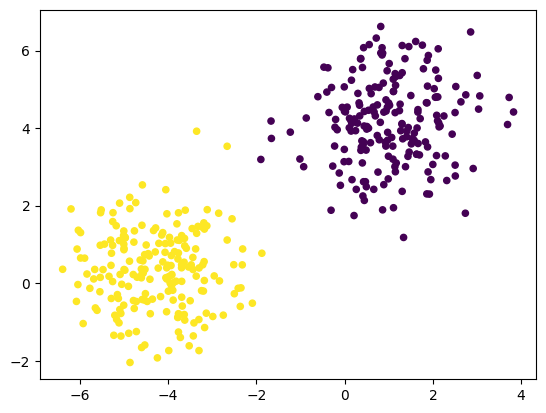

In [130]:
x,y = make_blobs(n_samples = 400 , centers =2 , random_state=3)
clf = svm.SVC(kernel='linear' , C = 10)

#it must learn from the model. This is done by passing our training set to the fit method.
clf.fit(x,y)

# scatter means put dot in part that is defined
# c make the color difference
# 2 parts in first shows the dimansion
plt.scatter(x[: , 0], x [: , 1] , c = y , s = 20 )
plt.show()


[-2.99639717 -0.85447796]


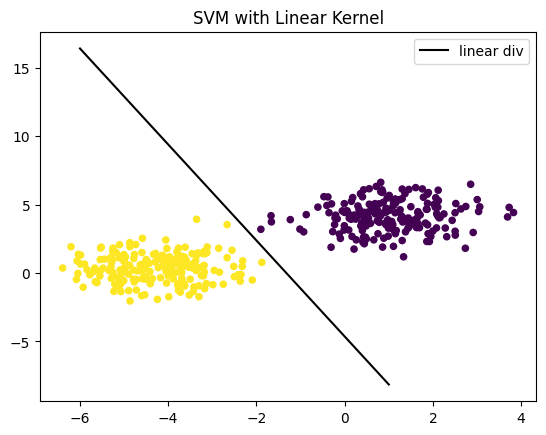

In [132]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(-6,1)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="linear div")

plt.scatter(x[:, 0], x[:, 1], c = y, s=20)
plt.title('SVM with Linear Kernel')
plt.legend()
plt.show()


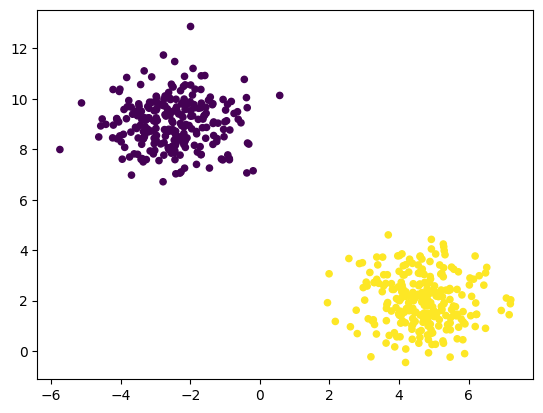

In [133]:
x,y = make_blobs(n_samples = 500 , centers =2 , random_state=42)

clf = svm.SVC(kernel='rbf', C=10)

# learn from the data
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
#clf.fit(X_train, y_train)
clf.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=20)

#find region of spot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# print(ax)
# print(ylim)

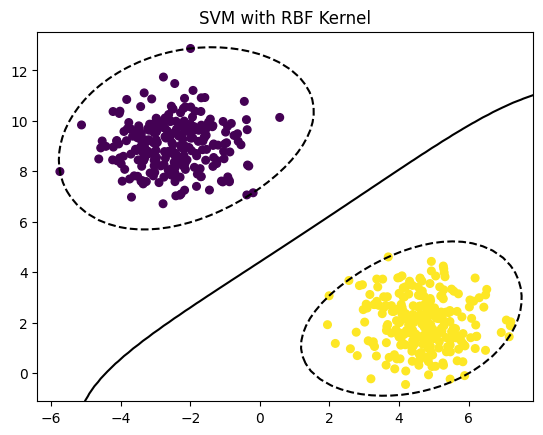

In [134]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=30)

#find region of spot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], num =50)
yy = np.linspace(ylim[0], ylim[1], num =50)
YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
#make shape like XX
Z = clf.decision_function(xy).reshape(XX.shape)

# level means which should u draw lines
ax.contour(XX, YY, Z, colors='k', levels = [-1,0,1]
           , linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 100, linewidth=1, facecolors='none')
plt.title('SVM with RBF Kernel')
plt.show()


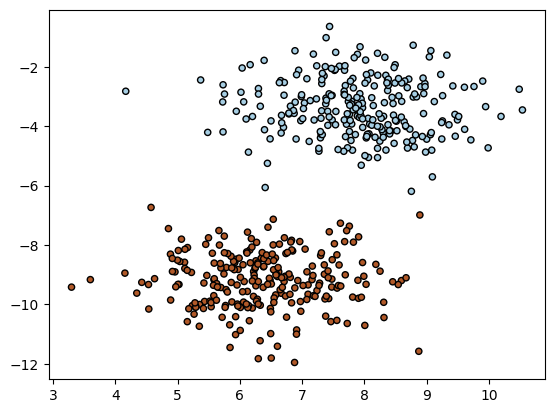

In [136]:
# Create synthetic dataset
X, y = make_blobs(n_samples=500, centers=2, random_state=6)

# Train an SVM with a polynomial kernel
clf = SVC(kernel='poly', degree=3, coef0=0.0)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=20)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


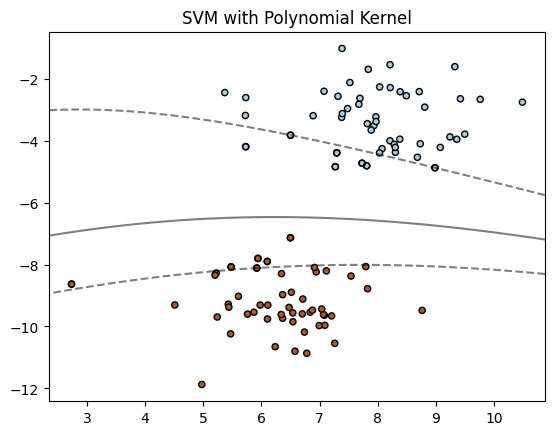

In [137]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

clf = SVC(kernel='poly', degree=3, coef0=0.0)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=20)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20, facecolors='none', edgecolors='k')

# Set labels and show the plot
plt.title('SVM with Polynomial Kernel')
plt.show()


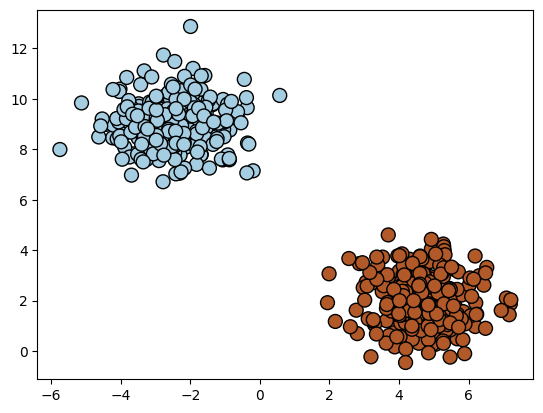

In [139]:
X, y = make_blobs(n_samples=500, centers=2, random_state=42)

# Train an SVM with a sigmoid kernel
clf = SVC(kernel='sigmoid', coef0=0.0)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=20)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

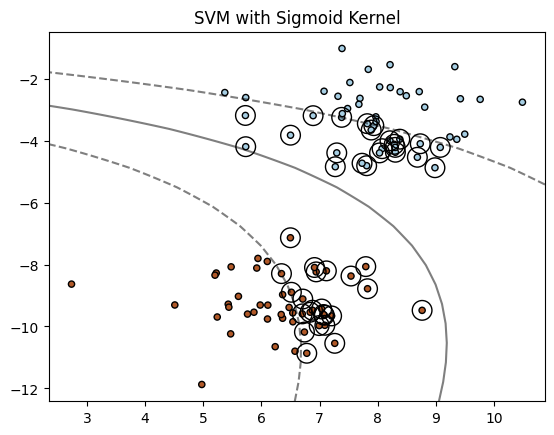

In [140]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

clf = SVC(kernel='sigmoid', coef0=0.0)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=20)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 20))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

# Set labels and show the plot
plt.title('SVM with Sigmoid Kernel')
plt.show()


# PART 1.2

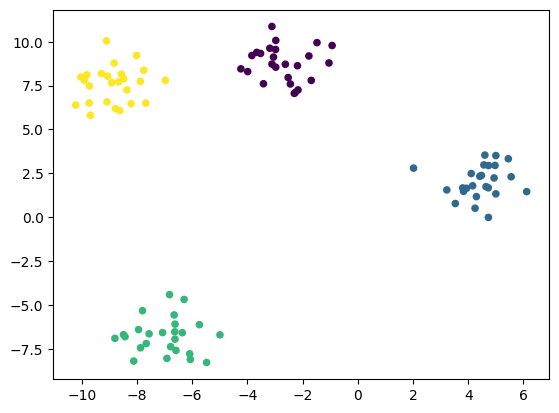

In [143]:
x,y = make_blobs(n_samples = 100 , centers = 4 , random_state= 42)

clf = svm.SVC(kernel='rbf', C=50)

clf.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=20)

#find region of spot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# print(ax)
# print(ylim)

ValueError: cannot reshape array of size 10000 into shape (50,50)

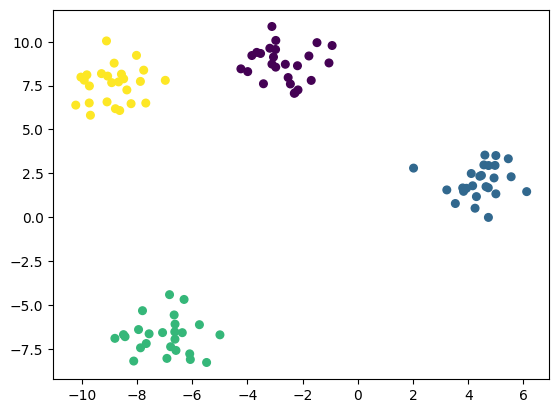

In [145]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=30)

# Find region of the plot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Adjust the number of points in xx and yy
xx = np.linspace(xlim[0], xlim[1], num=XX.shape[1])
yy = np.linspace(ylim[0], ylim[1], num=XX.shape[0])

# Create the meshgrid
YY, XX = np.meshgrid(yy, xx)

# Create the xy array
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Compute decision function and reshape
Z = clf.decision_function(xy).reshape(XX.shape)

# level means which should u draw lines
ax.contour(XX, YY, Z, colors='k', levels = [-1,0,1]
           , linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 100, linewidth=1, facecolors='none')
plt.title('SVM with RBF Kernel')
plt.show()


# PART 2


In [98]:
import os
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import random
import time

In [99]:
# # train data

# dir = "/content/drive/MyDrive/AI/images/train"
# categories = ['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']
# train_data = list()
# for category in categories:
#     path = os.path.join(dir , category)
#     label = categories.index(category)
#     for img in os.listdir(path):
#         imgpath = os.path.join(path , img)
#         digit_img = cv2.imread(imgpath , 0)
#         try:
#             digit_img = cv2.resize(digit_img , (50,50))
#             image = np.array(digit_img).flatten()
#             train_data.append([image , label])
#         except Exception as e:
#             pass



In [100]:
# directory = os.path.dirname('/content/drive/MyDrive/AI/SVM/train_data.pickle')
# if not os.path.exists(directory):
#     os.makedirs(directory)


# pick_in = open('/content/drive/MyDrive/AI/SVM/train_data.pickle' , 'wb')
# pickle.dump(train_data , pick_in)
# pick_in.close()

In [101]:
# # test data

# dir = "/content/drive/MyDrive/AI/images/test"
# categories = ['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']
# test_data = []
# for category in categories:
#     path = os.path.join(dir , category)
#     label = categories.index(category)
#     for img in os.listdir(path):
#         imgpath = os.path.join(path , img)
#         digit_img = cv2.imread(imgpath , 0)
#         try:
#             digit_img = cv2.resize(digit_img , (50,50))
#             image = np.array(digit_img).flatten()
#             test_data.append([image , label])
#         except Exception as e:
#             pass



In [102]:
# directory = os.path.dirname('/content/drive/MyDrive/AI/SVM/test_data.pickle')
# if not os.path.exists(directory):
#     os.makedirs(directory)

# pick_in = open('/content/drive/MyDrive/AI/SVM/test_data.pickle' , 'wb')
# pickle.dump(test_data , pick_in)
# pick_in.close()

In [103]:
pick_in_train = open('/content/drive/MyDrive/AI/SVM/train_data.pickle' , 'rb')
train_data = pickle.load(pick_in_train)
pick_in_train.close()

pick_in_test = open('/content/drive/MyDrive/AI/SVM/test_data.pickle' , 'rb')
test_data = pickle.load(pick_in_test)
pick_in_test.close()

Xtrain = []
Ytrain = []
Xtest = []
Ytest = []
for x , y in train_data:
    Xtrain.append(x)
    Ytrain.append(y)

for x , y in test_data:
    Xtest.append(x)
    Ytest.append(y)


In [104]:
start = time.time()

model = SVC(kernel='rbf')
model.fit(Xtrain , Ytrain)


SVC()

In [105]:
yPredict = model.predict(Xtest)

accuracy = model.score(Xtest , Ytest)
print(f"Accuracy: {accuracy}" )

end = time.time()
print("Execution time = " , end - start)

Accuracy: 0.949185989146522
Execution time =  45.28024697303772



Predicion of number 3: 



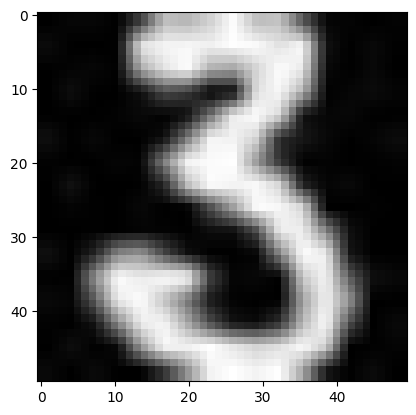


Predicion of number 0: 



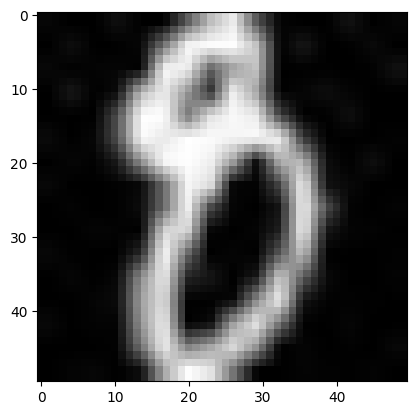


Predicion of number 7: 



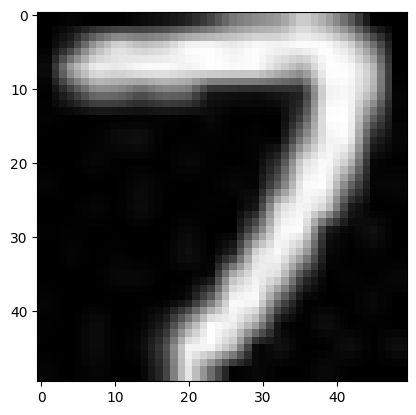


Predicion of number 6: 



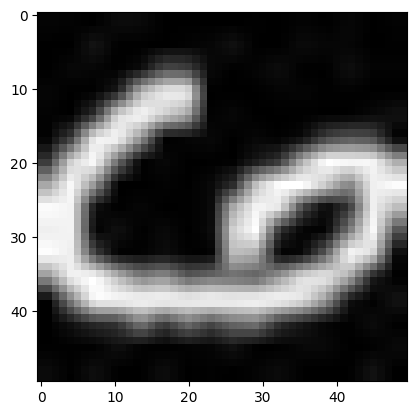


Predicion of number 0: 



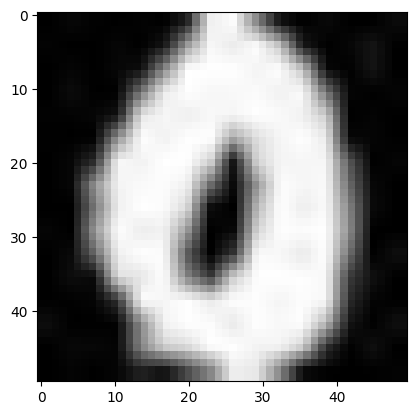


Predicion of number 3: 



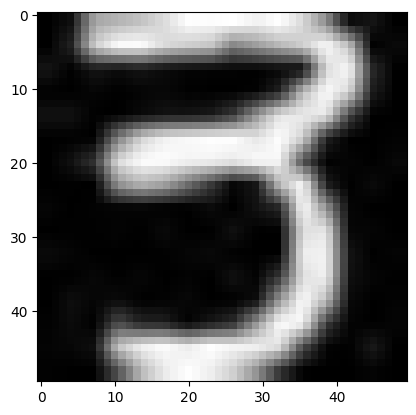


Predicion of number 0: 



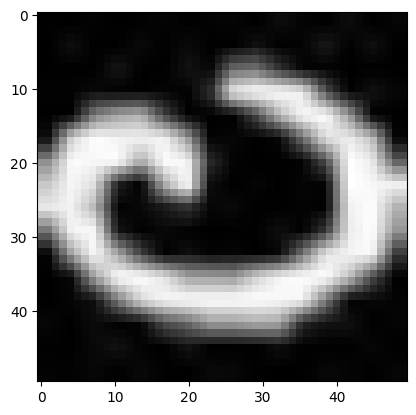


Predicion of number 1: 



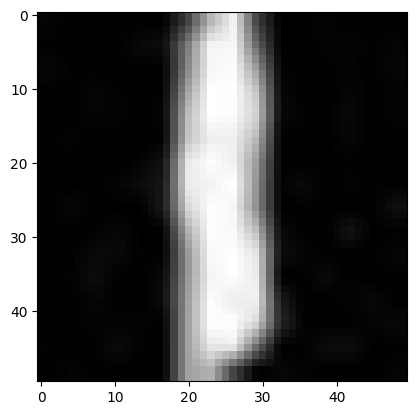


Predicion of number 4: 



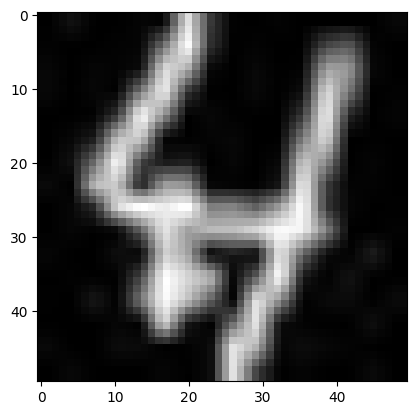


Predicion of number 0: 



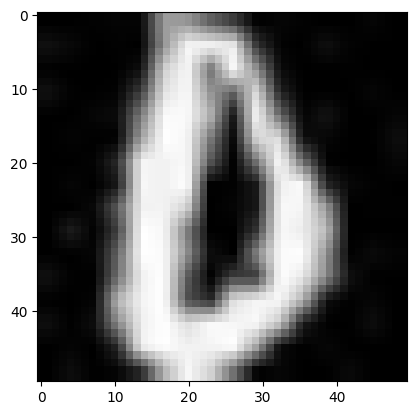

In [106]:
# showing some random pictures
for i in range(10):
  random.seed(random.randint(0, 100))
  random_index = random.randint(0 , len(Ytest)-1)
  mydigit = Xtest[random_index].reshape(50,50)
  print(f"\nPredicion of number {categories[yPredict[random_index]]}: \n")
  plt.imshow(mydigit , cmap='gray')
  plt.show()

# PART 3


In [107]:
import os
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import random
import time

In [108]:
# # train data

# animal_dir = "/content/drive/MyDrive/AI/SVM/AnimalFace/train"
# animal_categories = ['LionHead', 'EagleHead']
# animal_train_data = list()
# for category in animal_categories:
#     path = os.path.join(animal_dir , category)
#     label = animal_categories.index(category)
#     for img in os.listdir(path):
#         imgpath = os.path.join(path , img)
#         digit_img = cv2.imread(imgpath , 0)
#         try:
#             digit_img = cv2.resize(digit_img , (50,50))
#             image = np.array(digit_img).flatten()
#             animal_train_data.append([image , label])
#         except Exception as e:
#             pass



In [109]:
# animal_directory = os.path.dirname('/content/drive/MyDrive/AI/SVM/animal_train_data.pickle')
# if not os.path.exists(animal_directory):
#     os.makedirs(animal_directory)


# pick_in = open('/content/drive/MyDrive/AI/SVM/animal_train_data.pickle' , 'wb')
# pickle.dump(animal_train_data , pick_in)
# pick_in.close()

In [110]:
# # test data

# animal_dir = "/content/drive/MyDrive/AI/SVM/AnimalFace/test"
# animal_categories = ['LionHead', 'EagleHead']
# animal_test_data = []
# for categpick_in_testory in animal_categories:
#     path = os.path.join(animal_dir , category)
#     label = animal_categories.index(category)
#     for img in os.listdir(path):
#         imgpath = os.path.join(path , img)
#         digit_img = cv2.imread(imgpath , 0)
#         try:
#             digit_img = cv2.resize(digit_img , (50,50))
#             image = np.array(digit_img).flatten()
#             animal_test_data.append([image , label])
#         except Exception as e:
#             pass



In [111]:
# animal_directory = os.path.dirname('/content/drive/MyDrive/AI/SVM/animal_test_data.pickle')
# if not os.path.exists(animal_directory):
#     os.makedirs(animal_directory)

# pick_in = open('/content/drive/MyDrive/AI/SVM/animal_test_data.pickle' , 'wb')
# pickle.dump(animal_test_data , pick_in)
# pick_in.close()

In [112]:
animal_pick_in_train = open('/content/drive/MyDrive/AI/SVM/animal_train_data.pickle' , 'rb')
train_data = pickle.load(animal_pick_in_train)
animal_pick_in_train.close()

animal_pick_in_test = open('/content/drive/MyDrive/AI/SVM/animal_test_data.pickle' , 'rb')
test_data = pickle.load(animal_pick_in_test)
animal_pick_in_test.close()

Xtrain = []
Ytrain = []
Xtest = []
Ytest = []
for x , y in train_data:
    Xtrain.append(x)
    Ytrain.append(y)

for x , y in test_data:
    Xtest.append(x)
    Ytest.append(y)

testing wuth 4 type of kernels...

In [113]:
start = time.time()

model = SVC(kernel='sigmoid')
model.fit(Xtrain , Ytrain)

yPredict = model.predict(Xtest)

accuracy = model.score(Xtest , Ytest)
print(f"Accuracy: {accuracy}" )

end = time.time()
print("Execution time = " , end - start)

Accuracy: 0.5
Execution time =  0.017901897430419922



Predicion of animal Lion: 



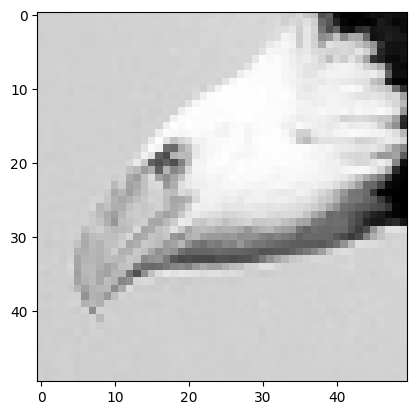


Predicion of animal Lion: 



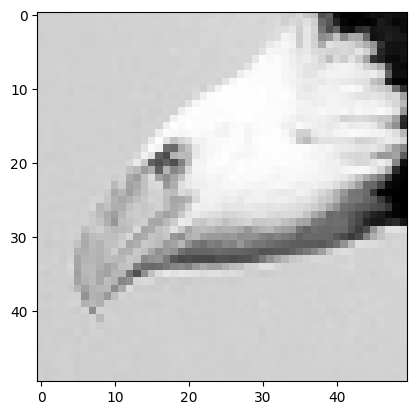


Predicion of animal Lion: 



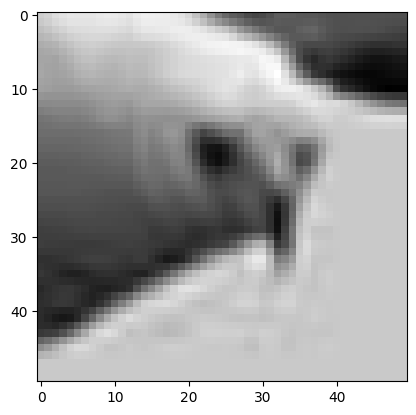


Predicion of animal Lion: 



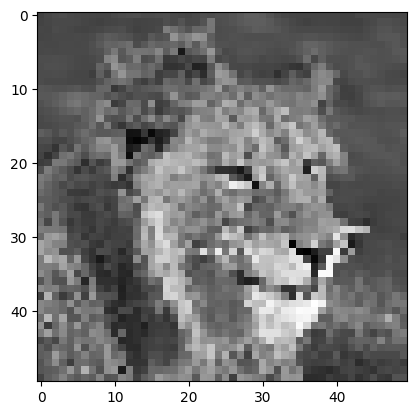


Predicion of animal Lion: 



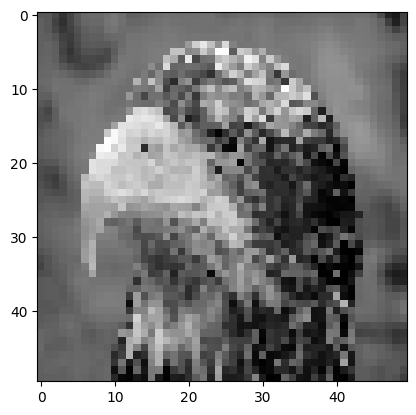

In [114]:
# showing some random pictures
for i in range(5):
  random_index = random.randint(0 , len(Ytest)-1)
  mydigit = Xtest[random_index].reshape(50,50)
  print(f"\nPredicion of animal {animal_categories[yPredict[random_index]][:-4]}: \n")
  plt.imshow(mydigit , cmap='gray')
  plt.show()

In [115]:
start = time.time()

model = SVC(kernel='linear')
model.fit(Xtrain , Ytrain)

yPredict = model.predict(Xtest)

accuracy = model.score(Xtest , Ytest)
print(f"Accuracy: {accuracy}" )

end = time.time()
print("Execution time = " , end - start)

Accuracy: 0.573170731707317
Execution time =  0.019498348236083984



Predicion of animal Lion: 



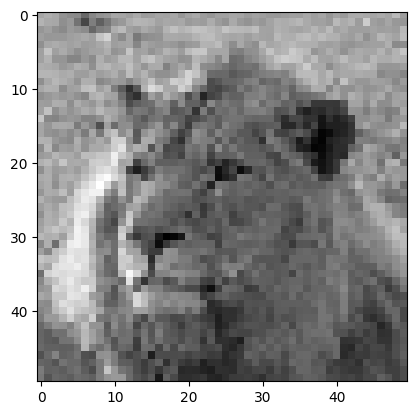


Predicion of animal Lion: 



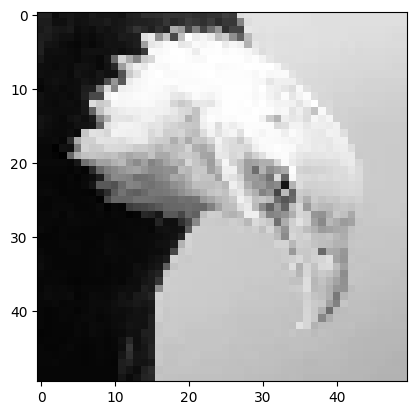


Predicion of animal Eagle: 



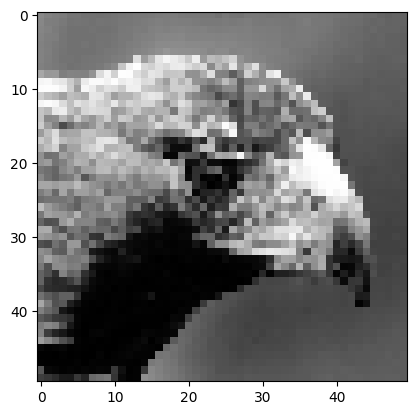


Predicion of animal Lion: 



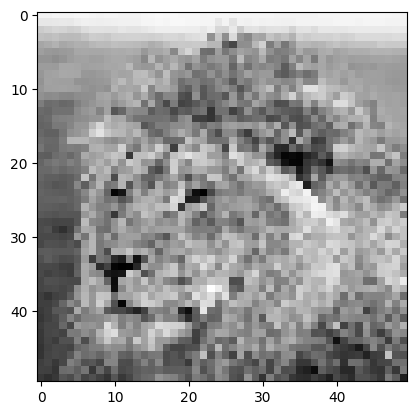


Predicion of animal Lion: 



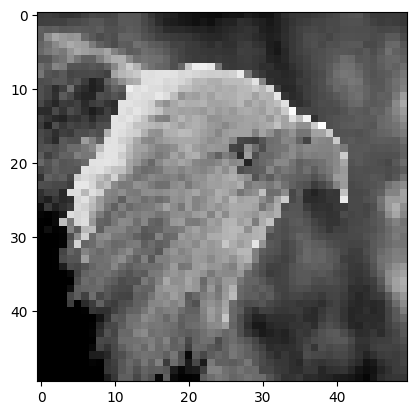

In [116]:
# showing some random pictures
for i in range(5):
  random_index = random.randint(0 , len(Ytest)-1)
  mydigit = Xtest[random_index].reshape(50,50)
  print(f"\nPredicion of animal {animal_categories[yPredict[random_index]][:-4]}: \n")
  plt.imshow(mydigit , cmap='gray')
  plt.show()

In [117]:
start = time.time()

model = SVC(kernel='poly')
model.fit(Xtrain , Ytrain)

yPredict = model.predict(Xtest)

accuracy = model.score(Xtest , Ytest)
print(f"Accuracy: {accuracy}" )

end = time.time()
print("Execution time = " , end - start)

Accuracy: 0.6341463414634146
Execution time =  0.020452022552490234



Predicion of animal Lion: 



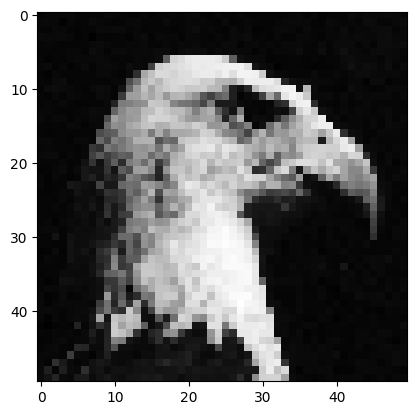


Predicion of animal Lion: 



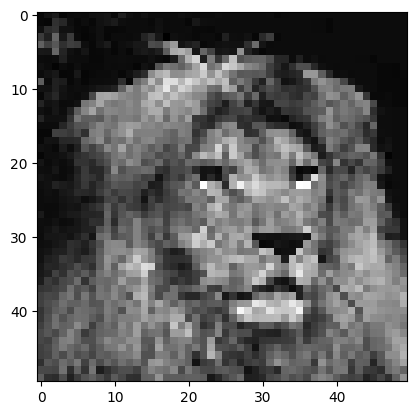


Predicion of animal Lion: 



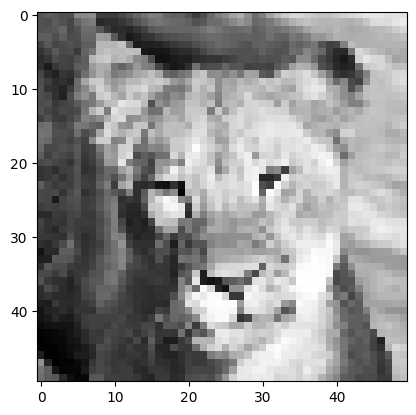


Predicion of animal Lion: 



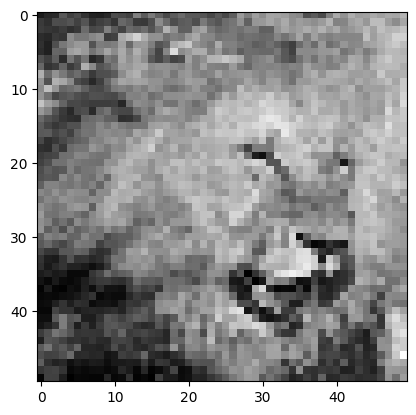


Predicion of animal Lion: 



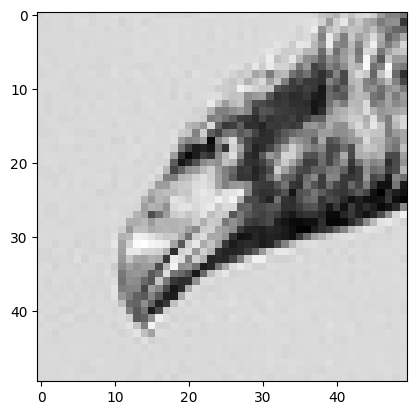

In [118]:
# showing some random pictures
for i in range(5):
  random_index = random.randint(0 , len(Ytest)-1)
  mydigit = Xtest[random_index].reshape(50,50)
  print(f"\nPredicion of animal {animal_categories[yPredict[random_index]][:-4]}: \n")
  plt.imshow(mydigit , cmap='gray')
  plt.show()

In [119]:
start = time.time()

model = SVC(kernel='rbf')
model.fit(Xtrain , Ytrain)

yPredict = model.predict(Xtest)

accuracy = model.score(Xtest , Ytest)
print(f"Accuracy: {accuracy}" )

end = time.time()
print("Execution time = " , end - start)

Accuracy: 0.7865853658536586
Execution time =  0.03722381591796875



Predicion of animal Eagle: 



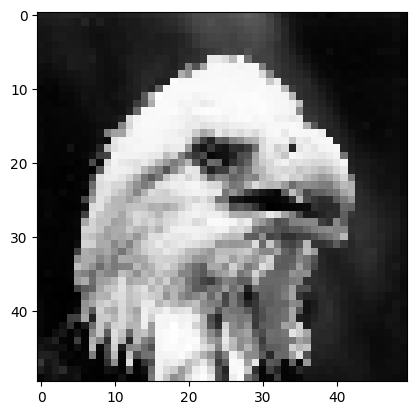


Predicion of animal Lion: 



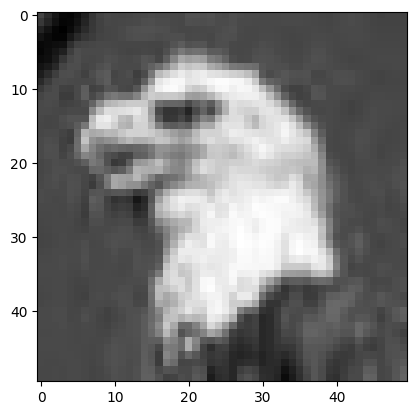


Predicion of animal Eagle: 



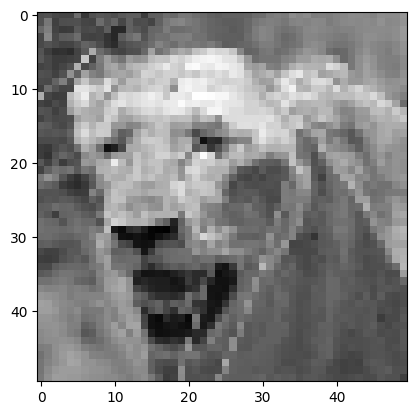


Predicion of animal Lion: 



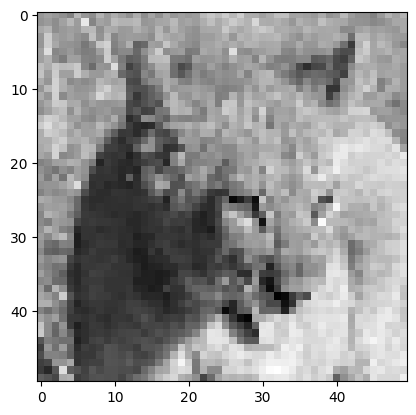


Predicion of animal Lion: 



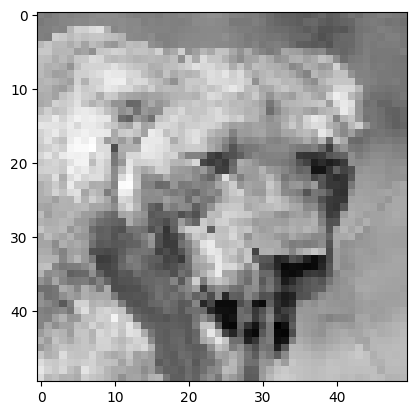

In [120]:
# showing some random pictures
for i in range(5):
  random_index = random.randint(0 , len(Ytest)-1)
  mydigit = Xtest[random_index].reshape(50,50)
  print(f"\nPredicion of animal {animal_categories[yPredict[random_index]][:-4]}: \n")
  plt.imshow(mydigit , cmap='gray')
  plt.show()